# **Retrieving vector data**

## goals of the tutorial
- geocoding / reverse geocoding
- OGC services
- understand openstreetmap
- understand the openstreetmap data model
- manage openstreetmap data in geopandas

**based on the open data of:**
- [geocoders](https://getlan.lot)
- [national repertoire of territorial data](https://geodati.gov.it/geoportale/)
- [geoportal of Trentino](http://www.territorio.provincia.tn.it/portal/server.pt/community/portale_geocartografico_trentino/254)
- [openstreetmap](https://wiki.openstreetmap.org)


### requirements
- python knowledge
- geopandas
- gis concepts


**status**

*looking for data*

---

# Geocoding / reverse geocoding

## Setup

In [400]:
try:
    import geopy
except ModuleNotFoundError as e:
    !pip install geopy==2.3.0
    import geopy
if geopy.__version__ != "2.3.0":
    !pip install -U geopy==2.3.0
    import geopy

In [401]:
try:
  import mapclassify
except ModuleNotFoundError as e:
  !pip install mapclassify==2.6.0
  import mapclassify

if mapclassify.__version__ != "2.6.0":
  !pip install -U mapclassify==2.6.0

In [402]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.14.0
  import geopandas as gpd

if gpd.__version__ != "0.14.0":
  !pip install -U geopandas==0.14.0
  import geopandas as gpd

In [403]:
import geopandas as gpd
from matplotlib import pyplot as plt

**GEOCODING service**

![](https://avatars2.githubusercontent.com/u/1385808?s=400&v=4")

- the geopandas module is based on [geopy](https://geopy.readthedocs.io/en/stable/)
- all the goecoders service are available [here](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders)


**NOTE**

Attention to the Rate Limit in Pandas<br/>
more info [here](https://geopy.readthedocs.io/en/stable/#usage-with-pandas)

**choose the right service**
<br/><br/>

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/getlonlat.png)

<br/><br/>
visit [getlon.lat](https://getlon.lat/)

## geocoding

In [404]:
cols = ['city']
names = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
cities = gpd.GeoDataFrame(names,columns=cols)

In [405]:
cities

city
0      Roma
1   Palermo
2    Trento
3    Genova
4      Bari
5   Trieste
6    Napoli
7  Cagliari
8   Messina
9     Lecce

In [406]:
geo_cities = gpd.tools.geocode(cities.city, provider="arcgis")
%time

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 37.7 µs


In [407]:
geo_cities

geometry   address
0  POINT (12.49565 41.90322)      Roma
1  POINT (13.36112 38.12207)   Palermo
2  POINT (11.11929 46.07005)    Trento
3   POINT (8.93917 44.41048)    Genova
4  POINT (16.86666 41.12587)      Bari
5  POINT (13.77269 45.65757)   Trieste
6  POINT (14.25227 40.84014)    Napoli
7   POINT (9.11049 39.21454)  Cagliari
8  POINT (15.55309 38.17839)   Messina
9  POINT (18.16802 40.35796)     Lecce

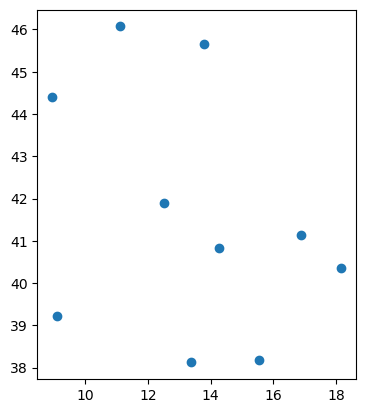

In [408]:
geo_cities.plot()
plt.show()

## reverse geocoding

In [409]:
from geopy.geocoders import Nominatim

In [410]:
geo_cities

geometry   address
0  POINT (12.49565 41.90322)      Roma
1  POINT (13.36112 38.12207)   Palermo
2  POINT (11.11929 46.07005)    Trento
3   POINT (8.93917 44.41048)    Genova
4  POINT (16.86666 41.12587)      Bari
5  POINT (13.77269 45.65757)   Trieste
6  POINT (14.25227 40.84014)    Napoli
7   POINT (9.11049 39.21454)  Cagliari
8  POINT (15.55309 38.17839)   Messina
9  POINT (18.16802 40.35796)     Lecce

In [411]:
point = geo_cities.geometry[2]

In [412]:
point.wkt

'POINT (11.11929 46.07005)'

In [413]:
type(point.x)

numpy.float64

In [414]:
latlon = str(point.y) + "," + str(point.x)

In [415]:
geolocator = Nominatim(user_agent="Example for the course")

.. but better if use a user agent like

*Mozilla/5.0 (Linux; Android 10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36*

Eg

*geolocator = Nominatim(user_agent="Mozilla/5.0 (Linux; Android10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36")*



In [416]:
location = geolocator.reverse(latlon)
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


the raw method contains all the data available from the geocoder

In [417]:
location.raw

{'place_id': 94562911,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 73293763,
 'lat': '46.070178',
 'lon': '11.119240793834841',
 'class': 'tourism',
 'type': 'hostel',
 'place_rank': 30,
 'importance': 9.99999999995449e-06,
 'addresstype': 'tourism',
 'name': 'Giovane Europa',
 'display_name': "Giovane Europa, 15, Via Torre Vanga, Bolghera, Piedicastello, Vela, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia",
 'address': {'tourism': 'Giovane Europa',
  'house_number': '15',
  'road': 'Via Torre Vanga',
  'suburb': 'Bolghera',
  'village': 'Vela',
  'city': 'Trento',
  'municipality': "Territorio Val d'Adige",
  'county': 'Provincia di Trento',
  'ISO3166-2-lvl6': 'IT-TN',
  'state': 'Trentino-Alto Adige/Südtirol',
  'ISO3166-2-lvl4': 'IT-32',
  'postcode': '38122',
  'country': 'Italia',
  'country_code': 'it'},
 'boundingbox': ['46.0700951', '46.0703188', '11.11902

## suggestion for a good geocoding
more details you add and more fortune you have to obtain a good result

In [418]:
q="Via Verdi, 26"

In [419]:
point = gpd.tools.geocode(q, provider="arcgis")

In [420]:
point

geometry                         address
0  POINT (-80.14852 26.36047)  Via Verde, Boca Raton, Florida

In [421]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

add details like city and State

In [422]:
q="Via Giuseppe Verdi, 26,  Trento, Italia"

In [423]:
point = gpd.tools.geocode(q, provider="arcgis") 

In [424]:
point

geometry                               address
0  POINT (11.11966 46.06665)  Via Giuseppe Verdi 26, 38122, Trento

In [425]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

Try a different geocoder

In [426]:
point_nominatim = gpd.tools.geocode(q,provider="Nominatim",user_agent="Example for the course")

In [427]:
point_nominatim

geometry  \
0  POINT (11.11990 46.06620)   

                                             address  
0  26, Via Giuseppe Verdi, Bolghera, Centro stori...

In [428]:
q="Via Giuseppe Verdi, 26,  Trento, Italia"

In [429]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim",user_agent="Example for the course")

In [430]:
point_nominatim

geometry  \
0  POINT (11.11990 46.06620)   

                                             address  
0  26, Via Giuseppe Verdi, Bolghera, Centro stori...

In [431]:
point_nominatim.explore(marker_kwds={"color": "green", "radius": "10"})

calculate the difference between the two points

In [432]:
distance = point.to_crs('epsg:32632').geometry.distance(point_nominatim.geometry.to_crs('epsg:32632')).values[0]

In [433]:
distance

53.2234395547427

**NOTE**:<br/>
A geocoder can offers more as one results<br/>
Eg. Nominatim

In [434]:
more_values = geolocator.geocode(q,exactly_one=False)

In [435]:
more_values

[Location(26, Via Giuseppe Verdi, Bolghera, Centro storico, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia, (46.0662011, 11.1198995, 0.0)),
 Location(Dipartimento di Sociologia e Ricerca Sociale, 26, Via Giuseppe Verdi, Bolghera, Centro storico, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia, (46.066413499999996, 11.119705644680646, 0.0)),
 Location(26, Via Giuseppe Verdi, Bolghera, Centro storico, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia, (46.066644, 11.1196548, 0.0))]

In [436]:
more_values[1].raw

{'place_id': 94225950,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 813142997,
 'lat': '46.066413499999996',
 'lon': '11.119705644680646',
 'class': 'amenity',
 'type': 'university',
 'place_rank': 30,
 'importance': 9.99999999995449e-06,
 'addresstype': 'amenity',
 'name': 'Dipartimento di Sociologia e Ricerca Sociale',
 'display_name': "Dipartimento di Sociologia e Ricerca Sociale, 26, Via Giuseppe Verdi, Bolghera, Centro storico, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia",
 'boundingbox': ['46.0659874', '46.0666732', '11.1191836', '11.1202620']}

In [437]:
more_values[1].point

Point(46.066413499999996, 11.119705644680646, 0.0)

## **Summary**

- geocoding is, first of all, an NLP problem
- geocoding services try to normalize the query by identifying the object you are looking for
- the more information of a geographic hierarchical order the better the geocoder results
- it is difficult to have an always updated address database
- many geocoders, where they do not find the value, return a value inferred from the interpopulation
- accuracy depends on what you are looking for
- a geocoder always tries to give an answer<br/>&nbsp;an excellent geocoder also returns the value of the precision estimate


# OGC Services
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_services.png)

---

## Catalog Service for the Web

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/geocatalog_pat.png)

---

https://siat.provincia.tn.it/geonetwork/srv/eng/catalog.search




## Setup
https://geopython.github.io/OWSLib/

In [438]:
try:
    import owslib
except ModuleNotFoundError as e:
    !pip install owslib==0.29.2 --break-system-packages
    import owslib
    
if owslib.__version__ != "0.29.2":
    !pip install -U owslib==0.29.2 --break-system-packages
    import owslib

Defaulting to user installation because normal site-packages is not writeable


In [439]:
from owslib.csw import CatalogueServiceWeb

In [440]:
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [441]:
csw.service

'CSW'

In [442]:
[op.name for op in csw.operations]

['GetCapabilities',
 'DescribeRecord',
 'GetRecords',
 'GetRecordById',
 'Transaction',
 'Harvest']

In [443]:
from owslib.fes import PropertyIsLike, BBox

fields to query

|                |                            |
|---             |---                         |
|field           | description                |
|*dc:title*      | title of the dataset       |
|*dc:description*| description of the dataset |
|*dc:subject*    | subject of the dataset     |
|*csw:AnyText*   | in all the fields          |

*PropertyIsLike* means that you can use the *LIKE* syntax of SQL

Eg. *%rento* => each word that ends with 'rento'

In [444]:
trento_query = PropertyIsLike('csw:AnyText', 'Trento')

In [445]:
csw.getrecords2(constraints=[trento_query],maxrecords=100)

In [446]:
csw.results

{'matches': 144, 'returned': 100, 'nextrecord': 101}

In [447]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

p_tn:SECAP_APRIE_Trento - SECAP APRIE Trento
agea:00129:20090724:090446 - Ortofotocarta Trento 2003
agea:00377:20090911:093144 - Ortofotocarta Trento 2008
agea:00128:20090724:085449 - Ortofotocarta Trento 1997
p_TN:377793f1-1094-4e81-810e-403897418b23 - Limite Provinciale della Provincia Autonoma di Trento
ispra_rm:Meta_Geo_SV000056_RN - Trento topografia 25k - View Service
p_TN:6180b262-787f-4c70-93e2-b774f698f544 - Limite Provinciale della Provincia Autonoma di Trento - wms
p_TN:09889801-a323-43c9-b336-462c28ef549d - Catasto Sorgenti della Provincia Autonoma di Trento
c_l378:toponomastica - Stradario, civici e toponimi del Comune di Trento
c_l378:ortofoto2009 - Ortofoto 2009
p_TN:04933f2c-3e81-4c68-8fd6-1fcfb40deb4b - Areale del castagno
p_TN:3c0db76b-a9ff-4293-b5fc-f1b44d9d85de - Proprietà forestali trentine
p_TN:8241b215-4a48-4ca3-97ba-e9eb2b3af90f - Stazioni forestali
p_TN:01ecba21-ca89-492e-9601-d585c4e1d5d1 - Zone ecologiche trentine
p_TN:2131bcc4-1a2b-46ff-a546-8c22aab0371a - C

```
p_TN:baee5106-0185-4428-bd35-b041bebc8564 - campsites
```

campsites of the Autonomous Province of Trento

In [448]:
s="p_TN:baee5106-0185-4428-bd35-b041bebc8564" 

In [449]:
record = csw.records[s]

In [450]:
record.title

'Campeggi'

In [451]:
record.abstract

"Il dataset contiene la localizzazione puntuale delle strutture ricettive all'aperto (campeggi, campeggi-villaggio e campeggi parco per vacanze), presenti sul territorio della Provincia di Trento."

In [452]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://idt.provincia.tn.it/idt/vector/p_TN_baee5106-0185-4428-bd35-b041bebc8564.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7B511E647F-FCEC-493D-83ED-6B820EF14F3B%7D


In [453]:
campsites = gpd.read_file('https://idt.provincia.tn.it/idt/vector/p_TN_baee5106-0185-4428-bd35-b041bebc8564.zip')

In [454]:
campsites.head(5)

cap  prec  quota           comune   classid                  dataagg  \
0  38050     3    769         TORCEGNO  TUR004_3  2021/01/01 00:00:00.000   
1  38067     3    660            LEDRO  TUR004_4  2021/01/01 00:00:00.000   
2  38053     3    871  CASTELLO TESINO  TUR004_6  2021/01/01 00:00:00.000   
3  38010     3   1042           ANDALO  TUR004_7  2021/01/01 00:00:00.000   
4  38062     3     91             ARCO  TUR004_8  2021/01/01 00:00:00.000   

   datafine        frazione  objectid       controllo  ... codice_str  \
0       NaN             NaN     26780  GMR 30/10/2020  ...     C00001   
1       NaN  PIEVE DI LEDRO     26781  GMR 30/10/2020  ...     C00003   
2       NaN          CELADO     26782  GMR 30/10/2020  ...      12266   
3       NaN             NaN     26783  GMR 30/10/2020  ...     C00008   
4       NaN           PRABI     26784  GMR 30/10/2020  ...     C00009   

              denominazi   fax_eserci   tel_eserci  \
0  CAMPEGGIO AI CASTAGNI  0461-766129  0461-766129   
1      CAMPEGGIO AL LAGO  0464-905467  0464-591250   
2        CAMPEGGIO ALICE          NaN  0461-594018   
3       CAMPEGGIO ANDALO  0461-585342  0461-585753   
4         CAMPEGGIO ARCO  0464-515525  0464-517491   

                   web_eserci                   sottotipol  \
0                         NaN  Campeggio parco per vacanze   
1      www.camping-al-lago.it                    Campeggio   
2       www.campeggioalice.it                    Campeggio   
3  www.andalo.life/it/camping  Campeggio parco per vacanze   
4       www.arcoturistica.com                    Campeggio   

                    email_eser periodo_ap livello_cl  \
0  campingaicastagni@libero.it    annuale          *   
1      info@camping-al-lago.it    annuale          *   
2     campeggioalice@libero.it    annuale        ***   
3  campeggio@andalolifepark.it    annuale         **   
4       info@arcoturistica.com    annuale        ***   

                              geometry  
0  MULTIPOINT (689306.819 5105762.615)  
1  MULTIPOINT (634360.000 5082549.000)  
2  MULTIPOINT (705152.431 5102825.779)  
3  MULTIPOINT (654860.000 5115035.000)  
4  MULTIPOINT (646688.911 5087665.405)  

[5 rows x 23 columns]

In [455]:
campsites.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

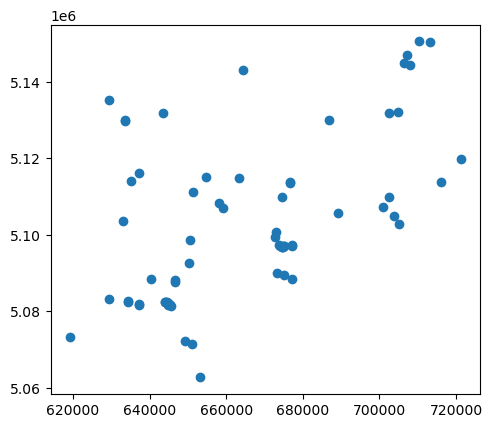

In [456]:
campsites.plot()
plt.show()

we can search by bounding box

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/bbox_klokantech.png)

[https://boundingbox.klokantech.com/](https://boundingbox.klokantech.com/)

In [457]:
csw = CatalogueServiceWeb("http://www.pcn.minambiente.it/geoportal/csw")
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [458]:
bbox_query = BBox([11.188617,45.965651,11.376758,46.073412])

In [459]:
csw.getrecords2(constraints=[bbox_query],maxrecords=100)

In [460]:
csw.results

{'matches': 2280, 'returned': 100, 'nextrecord': 101}

In [461]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

p_TN:bb9e5a5c-36bd-46a0-b7b5-67613b178777 - IFF2007 nel BACINO DEL FIUME BRENTA
c_l378:ortofoto2009 - Ortofoto 2009
c_l378:ct2000 - Carta Tecnica 1:2.000 alta risoluzione
c_l378:4e54a476-38a7-4c75-a692-c5c270b3c091-carta_semplificata - Carta Semplificata
c_l378:prg_vigente - PRG vigente
c_l378:toponomastica - Stradario, civici e toponimi del Comune di Trento
p_TN:3631bc23-87d1-4b55-8fe8-5e95a2323b01 - Piste Ciclabili - wms
p_TN:6180b262-787f-4c70-93e2-b774f698f544 - Limite Provinciale della Provincia Autonoma di Trento - wms
p_TN:80a69407-0e82-4571-9156-20a4754ae289 - Limite Comune Amministrativo - wms
p_TN:c743e9d8-7055-417e-a47b-269460a83d74 - Zone Speciali di Conservazione
p_TN:054e1af3-2dd8-4496-8b83-261cccc2674c - Ortofoto Ravina 2007 RGB
p_TN:0837bfca-dff2-4770-801f-235607f42b72 - LiDAR DTM - Modello Digitale del Terreno - Padergnone 2007
p_TN:0f944cb5-770f-44ff-aad2-36a47f24bc94 - LiDAR DSM - Modello Digitale delle Superfici - Ravina 2007
p_TN:152ad4d1-3263-4ae9-bce9-1265f019a78

In [462]:
s="p_TN:42f109d6-171c-432a-a287-b887e7ccc0d3"

In [463]:
record = csw.records[s]

In [464]:
record.title

'Valanghe - bacini valanghivi'

In [465]:
record.abstract

'Suddivisione del territorio provinciale in zone omogenee dal punto di vista del potenziale pericolo di valanghe'

In [466]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://www.territorio.provincia.tn.it/
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://idt.provincia.tn.it/idt/vector/p_TN_42f109d6-171c-432a-a287-b887e7ccc0d3.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7B9E2FD7E5-28E9-4EAE-80BA-9D79533CAC96%7D


## WFS

In [467]:
from owslib.wfs import WebFeatureService

In [468]:
url="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&Service=WFS"


In [469]:
wfs = WebFeatureService(url=url,version="1.1.0") #version can be: 1.0.0, 1.1.0, 2.0.0

In [470]:
wfs.contents

{'ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI': <owslib.feature.wfs110.ContentMetadata at 0x7f376d121a10>,
 'ID.ACQUEFISICHE.BACINIIDROGRAFICI.SECONDARI': <owslib.feature.wfs110.ContentMetadata at 0x7f376d16b390>}

In [471]:
wfs.identification.title

'Bacini idrografici principali e secondari'

In [472]:
[operation.name for operation in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [473]:
list(wfs.contents)

['ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI',
 'ID.ACQUEFISICHE.BACINIIDROGRAFICI.SECONDARI']

In [474]:
capabilities = wfs.getcapabilities().read()

In [475]:
capabilities

b'<WFS_Capabilities xmlns="http://www.opengis.net/wfs" xmlns:ogc="http://www.opengis.net/ogc" xmlns:ows="http://www.opengis.net/ows" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.1.0" xmlns:inspire_common="http://inspire.ec.europa.eu/schemas/common/1.0" xmlns:inspire_dls="http://inspire.ec.europa.eu/schemas/inspire_dls/1.0" xsi:schemaLocation="http://www.opengis.net/wfs http://schemas.opengis.net/wfs/1.1.0/wfs.xsd http://inspire.ec.europa.eu/schemas/inspire_dls/1.0 http://inspire.ec.europa.eu/schemas/inspire_dls/1.0/inspire_dls.xsd">\n  <ows:ServiceIdentification>\n    <ows:Title>Bacini idrografici principali e secondari</ows:Title>\n    <ows:Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini e i sottoba

```xml
<WFS_Capabilities xmlns="http://www.opengis.net/wfs" xmlns:ogc="http://www.opengis.net/ogc" xmlns:ows="http://www.opengis.net/ows" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.1.0" xmlns:inspire_common="http://inspire.ec.europa.eu/schemas/common/1.0" xmlns:inspire_dls="http://inspire.ec.europa.eu/schemas/inspire_dls/1.0" xsi:schemaLocation="http://www.opengis.net/wfs http://schemas.opengis.net/wfs/1.1.0/wfs.xsd http://inspire.ec.europa.eu/schemas/inspire_dls/1.0 http://inspire.ec.europa.eu/schemas/inspire_dls/1.0/inspire_dls.xsd">
<ows:ServiceIdentification>
<ows:Title>Bacini idrografici principali e secondari</ows:Title>
<ows:Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini e i sottobacini idrografici dei corsi d\'acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq. Risoluzione 1:10000</ows:Abstract>
<ows:ServiceType codeSpace="OGC">OGC WFS</ows:ServiceType>
<ows:ServiceTypeVersion>1.1.0</ows:ServiceTypeVersion>
<ows:Fees>Nessuna condizione applicata</ows:Fees>
<ows:AccessConstraints>Nessuno</ows:AccessConstraints>\n  </ows:ServiceIdentification>\n  <ows:ServiceProvider>
<ows:ProviderName>Geoportale Nazionale - Ministero dell\'Ambiente e della Tutela del Territorio e del Mare</ows:ProviderName>
<ows:ProviderSite xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map" xlink:type="simple" />
<ows:ServiceContact>
<ows:IndividualName>Geoportale Nazionale - Ministero dell\'Ambiente e della Tutela del Territorio e del Mare</ows:IndividualName>
<ows:PositionName>Distributore</ows:PositionName>
<ows:ContactInfo>
  <ows:Phone>
    <ows:Voice>+390657223140</ows:Voice>
    <ows:Facsimile />
  </ows:Phone>
  <ows:Address>
    <ows:DeliveryPoint>Via Cristoforo Colombo, 44</ows:DeliveryPoint>
    <ows:City>Roma</ows:City>
    <ows:AdministrativeArea>RM</ows:AdministrativeArea>
    <ows:PostalCode>00147</ows:PostalCode>
    <ows:Country>Italia</ows:Country>
    <ows:ElectronicMailAddress>pcn@minambiente.it</ows:ElectronicMailAddress>
  </ows:Address>
  <ows:OnlineResource xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map" xlink:type="simple" />
  <ows:HoursOfService />
  <ows:ContactInstructions />  
</ows:ContactInfo>
<ows:Role />

</ows:ServiceContact>\n  </ows:ServiceProvider>\n  <ows:OperationsMetadata>
<ows:Operation name="GetCapabilities">
<ows:DCP>
  <ows:HTTP>
    <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
    <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
  </ows:HTTP>
</ows:DCP>
<ows:Parameter name="service">
  <ows:Value>WFS</ows:Value>
</ows:Parameter>
<ows:Parameter name="AcceptVersions">
  <ows:Value>1.0.0</ows:Value>
  <ows:Value>1.1.0</ows:Value>
</ows:Parameter>
<ows:Parameter name="AcceptFormats">
  <ows:Value>text/xml</ows:Value>
</ows:Parameter>
</ows:Operation>
<ows:Operation name="DescribeFeatureType">
<ows:DCP>
  <ows:HTTP>
    <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
    <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
  </ows:HTTP>
</ows:DCP>
<ows:Parameter name="outputFormat">
  <ows:Value>XMLSCHEMA</ows:Value>
  <ows:Value>text/xml; subtype=gml/2.1.2</ows:Value>
  <ows:Value>text/xml; subtype=gml/3.1.1</ows:Value>
</ows:Parameter>
</ows:Operation>
<ows:Operation name="GetFeature">
<ows:DCP>
  <ows:HTTP>
    <ows:Get xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
    <ows:Post xlink:href="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Bacini_idrografici.map&amp;" xlink:type="simple" />
  </ows:HTTP>
</ows:DCP>
<ows:Parameter name="resultType">
  <ows:Value>results</ows:Value>
  <ows:Value>hits</ows:Value>
</ows:Parameter>
<ows:Parameter name="outputFormat">
  <ows:Value>text/xml; subtype=gml/3.1.1</ows:Value>
</ows:Parameter>
</ows:Operation>\n  <ows:ExtendedCapabilities><inspire_dls:ExtendedCapabilities><inspire_common:ResourceLocator xsi:type="inspire_common:resourceLocatorType"><inspire_common:URL>http://wms.pcn.minambiente.it/cgi-bin/mapserv.exe?map=/ms_ogc/wfs/Bacini_idrografici.map</inspire_common:URL><inspire_common:MediaType>application/vnd.ogc.wfs_xml</inspire_common:MediaType></inspire_common:ResourceLocator><inspire_common:ResourceType>service</inspire_common:ResourceType><inspire_common:TemporalReference><inspire_common:DateOfCreation>2011-09-20</inspire_common:DateOfCreation></inspire_common:TemporalReference><inspire_common:TemporalReference><inspire_common:DateOfPublication>2011-09-20</inspire_common:DateOfPublication></inspire_common:TemporalReference><inspire_common:TemporalReference><inspire_common:DateOfLastRevision>2013-01-23</inspire_common:DateOfLastRevision></inspire_common:TemporalReference><inspire_common:Conformity><inspire_common:Specification><inspire_common:Title>REGOLAMENTO (UE) N. 1089/2010 DELLA COMMISSIONE del 23 novembre 2010 recante attuazione della direttiva 2007/2/CE del Parlamento europeo e del Consiglio per quanto riguarda l\'interoperabilit&#224; dei set di dati territoriali e dei servizi di dati territoriali</inspire_common:Title><inspire_common:DateOfPublication>2010-12-08</inspire_common:DateOfPublication><inspire_common:URI>OJ:L:2010:323:0011:0102:IT:PDF</inspire_common:URI><inspire_common:ResourceLocator><inspire_common:URL>http://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2010:323:0011:0102:IT:PDF</inspire_common:URL><inspire_common:MediaType>application/pdf</inspire_common:MediaType></inspire_common:ResourceLocator></inspire_common:Specification><inspire_common:Degree>notConformant</inspire_common:Degree></inspire_common:Conformity><inspire_common:MetadataPointOfContact><inspire_common:OrganisationName>Ministero dell\'Ambiente e della Tutela del Territorio e del Mare - Geoportale Nazionale</inspire_common:OrganisationName><inspire_common:EmailAddress>pcn@minambiente.it</inspire_common:EmailAddress></inspire_common:MetadataPointOfContact><inspire_common:MetadataDate>2011-04-28</inspire_common:MetadataDate><inspire_common:SpatialDataServiceType>Download</inspire_common:SpatialDataServiceType><inspire_common:MandatoryKeyword><inspire_common:KeywordValue>infoFeatureAccessService</inspire_common:KeywordValue></inspire_common:MandatoryKeyword><inspire_common:Keyword xsi:type="inspire_common:inspireTheme_ita"><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - INSPIRE themes</inspire_common:Title><inspire_common:DateOfPublication>2008-06-01</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Idrografia</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:KeywordValue>Acque interne</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:Keyword><inspire_common:OriginatingControlledVocabulary><inspire_common:Title>GEMET - Concepts, version 2.4</inspire_common:Title><inspire_common:DateOfPublication>2010-01-13</inspire_common:DateOfPublication></inspire_common:OriginatingControlledVocabulary><inspire_common:KeywordValue>Bacino idrografico</inspire_common:KeywordValue></inspire_common:Keyword><inspire_common:SupportedLanguages><inspire_common:DefaultLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:DefaultLanguage><inspire_common:SupportedLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:SupportedLanguage></inspire_common:SupportedLanguages><inspire_common:ResponseLanguage><inspire_common:Language>ita</inspire_common:Language></inspire_common:ResponseLanguage></inspire_dls:ExtendedCapabilities></ows:ExtendedCapabilities></ows:OperationsMetadata>\n  <FeatureTypeList>
<Operations>
<Operation>Query</Operation>
</Operations>
<FeatureType>
<Name>ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI</Name>
<Title>Bacini idrografici principali</Title>
<Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini idrografici dei corsi d\'acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq. La tabella associata contiene le seguenti informazioni: dgc_codice, informazione non disponibile; id_bacino, identificativo del bacino idrografico; nome_bac, nome del bacino idrografico; nome_corso, nome del corso d\'acqua di riferimento; foglio_igm, foglio IGM di riferimento; ordine, ordine gerarchico; codifica, informazione non disponibile; autorita, autorit&#224; competente del bacino.</Abstract>
<ows:Keywords>
  <ows:Keyword>Idrografia</ows:Keyword>
  <ows:Keyword> Bacino idrografico</ows:Keyword>
</ows:Keywords>
<DefaultSRS>urn:ogc:def:crs:EPSG::4326</DefaultSRS>
<OutputFormats>
  <Format>text/xml; subtype=gml/3.1.1</Format>
</OutputFormats>
<ows:WGS84BoundingBox dimensions="2">
  <ows:LowerCorner>6 34.5</ows:LowerCorner>
  <ows:UpperCorner>19 49</ows:UpperCorner>
</ows:WGS84BoundingBox>
<MetadataURL format="ISO19115:2003" type="text/xml">http://www.pcn.minambiente.it/geoportal/csw?SERVICE=CSW&amp;VERSION=2.0.2&amp;REQUEST=GetRecordById&amp;outputSchema=http%3A%2F%2Fwww.isotc211.org%2F2005%2Fgmd&amp;elementSetName=full&amp;ID=m_amte:8HCH2C:f50c35ae-b0cf-4064-81f7-3556d0973157</MetadataURL>
</FeatureType>
<FeatureType>
<Name>ID.ACQUEFISICHE.BACINIIDROGRAFICI.SECONDARI</Name>
<Title>Bacini idrografici secondari</Title>
<Abstract>Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i sottobacini relativi ai corsi d\'acqua affluenti del I ordine con superficie maggiore o uguale a 200 Kmq. La tabella associata contiene le seguenti informazioni: dgc_codice, informazione non disponibile; id_bacino, identificativo del bacino idrografico; nome_bac, nome del bacino idrografico; nome_corso, nome del corso d\'acqua di riferimento; foglio_igm, foglio IGM di riferimento; ordine, ordine gerarchico; codifica, informazione non disponibile; autorita, autorit&#224; competente del bacino.</Abstract>
<ows:Keywords>
  <ows:Keyword>Idrografia</ows:Keyword>
  <ows:Keyword> Bacino idrografico</ows:Keyword>
</ows:Keywords>
<DefaultSRS>urn:ogc:def:crs:EPSG::4326</DefaultSRS>
<OutputFormats>
  <Format>text/xml; subtype=gml/3.1.1</Format>
</OutputFormats>
<ows:WGS84BoundingBox dimensions="2">
  <ows:LowerCorner>6 34.5</ows:LowerCorner>
  <ows:UpperCorner>19 49</ows:UpperCorner>
</ows:WGS84BoundingBox>
<MetadataURL format="ISO19115:2003" type="text/xml">http://www.pcn.minambiente.it/geoportal/csw?SERVICE=CSW&amp;VERSION=2.0.2&amp;REQUEST=GetRecordById&amp;outputSchema=http%3A%2F%2Fwww.isotc211.org%2F2005%2Fgmd&amp;elementSetName=full&amp;ID=m_amte:8HCH2C:81df4cb9-67e3-4fd0-abe5-91d1ce3e6e9d</MetadataURL>
</FeatureType>\n  </FeatureTypeList>\n  <ogc:Filter_Capabilities>
<ogc:Spatial_Capabilities>
<ogc:GeometryOperands>
  <ogc:GeometryOperand>gml:Point</ogc:GeometryOperand>
  <ogc:GeometryOperand>gml:LineString</ogc:GeometryOperand>
  <ogc:GeometryOperand>gml:Polygon</ogc:GeometryOperand>
  <ogc:GeometryOperand>gml:Envelope</ogc:GeometryOperand>
</ogc:GeometryOperands>
<ogc:SpatialOperators>
  <ogc:SpatialOperator name="Equals" />
  <ogc:SpatialOperator name="Disjoint" />
  <ogc:SpatialOperator name="Touches" />
  <ogc:SpatialOperator name="Within" />
  <ogc:SpatialOperator name="Overlaps" />
  <ogc:SpatialOperator name="Crosses" />
  <ogc:SpatialOperator name="Intersects" />
  <ogc:SpatialOperator name="Contains" />
  <ogc:SpatialOperator name="DWithin" />
  <ogc:SpatialOperator name="Beyond" />
  <ogc:SpatialOperator name="BBOX" />
</ogc:SpatialOperators>
</ogc:Spatial_Capabilities>
<ogc:Scalar_Capabilities>
<ogc:LogicalOperators />
<ogc:ComparisonOperators>
  <ogc:ComparisonOperator>LessThan</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>GreaterThan</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>LessThanEqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>GreaterThanEqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>EqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>NotEqualTo</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>Like</ogc:ComparisonOperator>
  <ogc:ComparisonOperator>Between</ogc:ComparisonOperator>
</ogc:ComparisonOperators>
</ogc:Scalar_Capabilities>
<ogc:Id_Capabilities>
<ogc:EID />
<ogc:FID />
</ogc:Id_Capabilities>\n  </ogc:Filter_Capabilities>\n</WFS_Capabilities>
```

In [476]:
for layer, meta in wfs.items():
    print(meta.__dict__)
    print(meta.title)
    print(meta.abstract)
    print(meta.crsOptions)
    print(meta.outputFormats)
    

{'auth': <Authentication shared=False username=None password=None cert=None verify=True auth_delegate=None>, 'headers': None, 'id': 'ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI', 'title': 'Bacini idrografici principali', 'abstract': "Sulla base dello strato informativo dei bacini idrografici a scala nazionale 1:250.000, congruente con il reticolo idrografico, sono stati individuati, secondo quanto previsto dal D.Lgs.152/99 e successivamente dalla Direttiva Quadro sulle Acque 2000/60/CE, i bacini idrografici dei corsi d'acqua scolanti a mare con superficie maggiore o uguale a 200 Kmq. La tabella associata contiene le seguenti informazioni: dgc_codice, informazione non disponibile; id_bacino, identificativo del bacino idrografico; nome_bac, nome del bacino idrografico; nome_corso, nome del corso d'acqua di riferimento; foglio_igm, foglio IGM di riferimento; ordine, ordine gerarchico; codifica, informazione non disponibile; autorita, autorità competente del bacino.", 'keywords': ['Idrogr

In [477]:
layer = list(wfs.contents)[0]

In [478]:
layer 

'ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI'

In [479]:
response = wfs.getfeature(typename=layer, bbox=(11.069141,46.038151,11.19823,46.112459),srsname='urn:ogc:def:crs:EPSG::4326')
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


In [480]:
basins_inbbox = gpd.read_file(response)

In [481]:
basins_inbbox.head()

gml_id  dgc_codice  id_bacino  \
0  ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI.1         7.0          0   
1  ID.ACQUEFISICHE.BACINIIDROGRAFICI.PRINCIPALI.7         3.0          0   

  nome_bac    nome_corso foglio_igm  ordine codifica            autorita  \
0    ADIGE   FIUME ADIGE    VENEZIA       1                    ADB ADIGE   
1   BRENTA  FIUME BRENTA    VENEZIA       1           ADB ALTO ADRIATICO   

                                            geometry  
0  MULTIPOLYGON (((46.53332 10.45039, 46.53329 10...  
1  MULTIPOLYGON (((45.88110 11.80038, 45.87744 11...

In [482]:
basins_inbbox.explore()

There is a problem with the orientation of the axes<br/>
This is a false problem because the official order of coordinates in EPSG:4326 is latitude and longitude.<br/>
Usually Geopandas corrects it alone.<br/>
In this case we need an operation to change the axes orientation<br/>
This function is supplied in the shapely package.<br/>

In [483]:
import shapely

example with a geometry

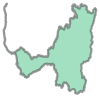

In [484]:
basins_inbbox.geometry[0]

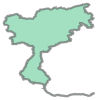

In [485]:
shapely.ops.transform(lambda x, y: (y, x),basins_inbbox.geometry[0])

creation of a function to be use in the *apply* method of pandas

In [486]:
def swapxy(geometry):
  geometry = shapely.ops.transform(lambda x, y: (y, x),geometry)
  return geometry

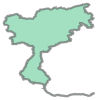

In [487]:
swapxy(basins_inbbox.geometry[0])

In [488]:
basins_inbbox['geometry'] = basins_inbbox['geometry'].apply(lambda geometry: swapxy(geometry))

In [489]:
basins_inbbox.explore()

## Summary WFS
- there are different versions
- from the version 1.1.0 you can have the problem of the axis inverted
- check always the boundary: more is big and more you have to wait.. more you have to wait and more the connection can go in timeout
- if the dataset is available as geojson you can load directly in geopandas
- otherwise you need to download in another format (eg. gml), save it and load as normal file


# OGG API is the future!!!

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/ogc_api.png)

visit 
- [https://ogcapi.ogc.org/](https://ogcapi.ogc.org/)
- [OGC API Features](https://github.com/INSPIRE-MIF/gp-ogc-api-features)
- [learning OGC API features](http://opengeospatial.github.io/e-learning/ogcapi-features/text/basic-main.html)
- [OGC API SensorThings](https://github.com/INSPIRE-MIF/gp-ogc-sensorthings-api)
- [OGC API Records](https://github.com/INSPIRE-MIF/gp-ogc-api-records)

examples
- [https://geoe3platform.eu/geoe3](https://geoe3platform.eu/geoe3)
- [https://geonovum.github.io/wfs3-experiments/docs/Clients.html](https://geonovum.github.io/wfs3-experiments/docs/Clients.html)





# OpenStreetMap is a Common

![](https://raw.githubusercontent.com/napo/geospatial_datascience_unitn_2023/main/images/OpenStreetMap%20a%20resource%20for%20the%20data%20science%20-%20UNITN.jpg)

[lecture here](https://docs.google.com/presentation/d/e/2PACX-1vRnBevBrlr10ySX1xRQZflhjwbjQfOxHb0XYVlDc7lSX19FPQEeIMQP3y5eW08z652yduYCmgheco5e/pub?start=false&loop=false&delayms=3000)



## RAW Data
OSM XML
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata1.png)

## OverPass API
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/overpassturbo.png)


* [http://overpass-turbo.eu/](http://overpass-turbo.eu/)
* [https://overpass-ultra.trailsta.sh/](https://overpass-ultra.trailsta.sh/)

## Protocol Buffer
[https://developers.google.com/protocol-buffers](https://developers.google.com/protocol-buffers )

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/pbf.png)


* [planet](https://planet.openstreetmap.org/)
* [geofabrik](https://download.geofabrik.de)
* [estratti osm italia](https://osmit-estratti.wmcloud.org/)

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hotosm.png)


[https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa](https://export.hotosm.org/en/v3/exports/91f6bf76-f310-46fe-a6dd-8f230489d1aa)

for the italian regions, provinces and cities you can use the service made by Wikimedia Italia 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm_estratti.png)

[https://osmit-estratti.wmcloud.org/](https://osmit-estratti.wmcloud.org/)

Eg.
[Trento](https://osmit-estratti.wmcloud.org/dati/poly/comuni/pbf/022205_Trento.osm.pbf)

You can transform the pbf to a geopackage by using ogr2ogr
```bash
wget https://osmit-estratti.wmcloud.org/dati/poly/comuni/pbf/022205_Trento.osm.pbf
ogr2ogr -f "GPKG" trento.gpkg 022205_Trento.osm.pbf
```

In [490]:
!wget https://osmit-estratti.wmcloud.org/dati/poly/comuni/pbf/022205_Trento.osm.pbf
!ogr2ogr -f "GPKG" trento.gpkg 022205_Trento.osm.pbf

--2023-09-29 00:26:55--  https://osmit-estratti.wmcloud.org/dati/poly/comuni/pbf/022205_Trento.osm.pbf
Resolving osmit-estratti.wmcloud.org (osmit-estratti.wmcloud.org)... 185.15.56.49
Connecting to osmit-estratti.wmcloud.org (osmit-estratti.wmcloud.org)|185.15.56.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4586099 (4,4M) [application/octet-stream]
Saving to: ‘022205_Trento.osm.pbf.1’

022205_Trento.osm.p  30%[=====>              ]   1,32M  1,23MB/s               

022205_Trento.osm.p 100%[===================>]   4,37M  2,00MB/s    in 2,2s    

2023-09-29 00:26:58 (2,00 MB/s) - ‘022205_Trento.osm.pbf.1’ saved [4586099/4586099]

0...10...20...30...40...50...60...70...80...90...100 - done.


In [491]:
import fiona
fiona.listlayers('trento.gpkg')

['points', 'lines', 'multilinestrings', 'multipolygons', 'other_relations']

In [492]:
lines = gpd.read_file("trento.gpkg",layer="lines")

In [493]:
lines.highway.unique()

array(['secondary', 'trunk_link', 'trunk', 'motorway_link', 'residential',
       'tertiary', 'unclassified', 'service', 'motorway', 'pedestrian',
       nan, 'steps', 'footway', 'path', 'secondary_link', 'cycleway',
       'track', 'primary', 'primary_link', 'tertiary_link', 'platform',
       'living_street', 'via_ferrata', 'services', 'raceway',
       'construction', 'proposed', 'yes'], dtype=object)

In [494]:
driving_roads = lines[lines.highway.isin(['secondary', 'trunk_link', 'trunk', 'motorway_link', 
                          'residential','tertiary', 'unclassified', 'service', 
                          'motorway', 'secondary_link', 'cycleway','primary', 
                          'primary_link', 'tertiary_link', 'living_street','services',"yes"])]

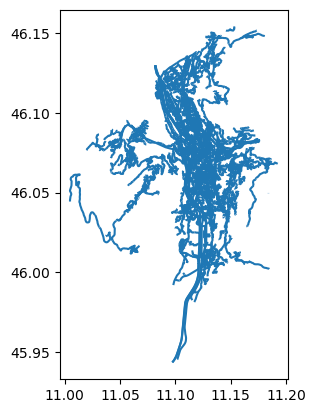

In [495]:
driving_roads.plot()
plt.show()

In [496]:
walking_roads = lines[lines.highway.isin(['pedestrian','steps', 'footway', 'path',
       'living_street', 'services','track'])]

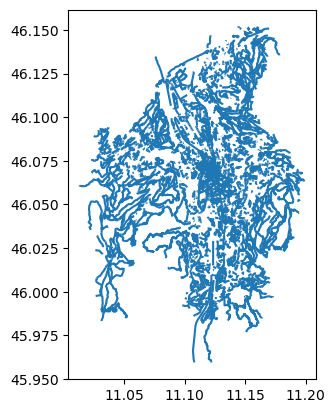

In [497]:
walking_roads.plot()
plt.show()

In [498]:
polygons = gpd.read_file("trento.gpkg",layer="multipolygons")

In [499]:
polygons.building.unique()

array([nan, 'yes', 'school', 'university', 'kiosk', 'office',
       'apartments', 'public_building', 'public', 'monastery', 'retail',
       'hospital', 'detached', 'residential', 'castle', 'parking',
       'train_station', 'house', 'church', 'sports_hall', 'bridge',
       'cathedral', 'commercial', 'service', 'supermarket', 'terrace',
       'roof', 'construction', 'warehouse', 'industrial', 'hotel',
       'presbytery', 'theatre', 'civic', 'data_center', 'shed', 'museum',
       'chapel', 'semidetached_house', 'kindergarten', 'ruins', 'cinema',
       'government', 'sports_centre', 'grandstand', 'transportation',
       'dormitory', 'depot', 'hostel', 'fire_station', 'garage',
       'garages', 'hangar', 'terminal', 'farm', 'private',
       'transformer_tower', 'greenhouse', 'farm_auxiliary', 'manufacture',
       'collapsed', 'azienda_agricola', 'convent', 'tower', 'hut',
       'stable', 'gazebo', 'static_caravan', 'carport'], dtype=object)

In [500]:
buildings = polygons[~polygons['building'].isna()]

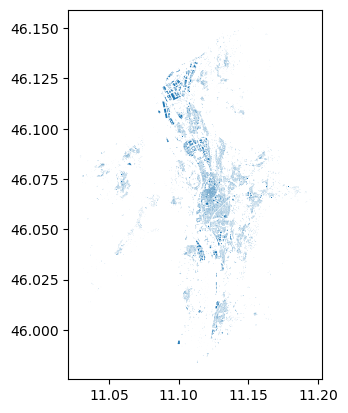

In [501]:
buildings.plot()
plt.show()

---
# Exercises
- identify the location of these address with a geocoder
   - Piazza Castello, Udine
   - Piazza Italia, Trento
   - Piazza Foroni, Torino
- find the administrative border of "comunità di valle" (community of valley) of Province Autonomous of Trento
- identify all the rivers inside the smallest community of valley of Trentino
- download from OpenStreetMap all supermarkets inside the bounding box of the city in this point <br/>latitude: 45.8861<br/>
longitude: 11.0447<br/>
- identify the longest road of the city (state roads, walking routes, motorways are excluded).<br/>
- How many drinking water are in this city?
- how many benches in this city have the backrest?